In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# loading the files
def load_email_from_dir(directory,label):
    # create the empty list to store the email contents
    emails = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        # contsruct the full path to the file
        file_path = os.path.join(directory,filename)
        # open and read the file, handling encoding
        with open(file_path,'r',encoding='latin-1') as file:
            content = file.read()
            emails.append({'Email':content,'label':label})
    return emails

In [ ]:
# Loading the emails from both easy ham and hard ham 
easy_ham_emails = load_email_from_dir(directory='path to your folder',label=0)
hard_ham_emails = load_email_from_dir(directory='path to your folder',label=0)

In [4]:
ham_emails = easy_ham_emails + hard_ham_emails

In [ ]:
spam_emails = load_email_from_dir(directory='path to your folder',label=1)

In [6]:
email = ham_emails + spam_emails

In [7]:
# converting to dataframe
df = pd.DataFrame(email)

In [8]:
df.head()

,Email,label
0,From exmh-workers-admin@redhat.com Thu Aug 22...,0
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,0
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,0
3,From irregulars-admin@tb.tf Thu Aug 22 14:23:...,0
4,From exmh-users-admin@redhat.com Thu Aug 22 1...,0


In [9]:
df = df.sample(frac=1,random_state=42).reset_index(drop = True)

In [10]:
df.head()

,Email,label
0,From exmh-workers-admin@redhat.com Fri Aug 23...,0
1,From fork-admin@xent.com Wed Sep 18 17:43:35 ...,0
2,From exmh-workers-admin@redhat.com Fri Aug 23...,0
3,From spamassassin-devel-admin@lists.sourceforg...,0
4,From sentto-2242572-56021-1034080421-zzzz=exam...,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Email   3302 non-null   object
 1   label   3302 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.7+ KB


In [15]:
# cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
cleaned_text = [] # list to store all the clean text
for i in range(0,3302):
    email = re.sub('[^a-zA-z^]',',',df['Email'][i])
    email = email.lower()
    email = email.split()
    ps = PorterStemmer()
    all_stopwords  = stopwords.words('english')
    all_stopwords.remove('not')
    email = [ps.stem(word)for word in email if not word in set(all_stopwords)]
    email =' '.join(email)
    cleaned_text.append(email)

In [18]:
# converting the email into vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(cleaned_text).toarray()

In [19]:
y = df.iloc[:,-1].values

In [20]:
# splitting data into training, and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
# Training dataset on Naive bayes
from sklearn.naive_bayes import MultinomialNB
naive_clf = MultinomialNB()
naive_clf.fit(X_train,y_train)

MultinomialNB()

In [25]:
# Evaluating the model on cross validation
from sklearn.model_selection import cross_val_score, GridSearchCV
score = cross_val_score(naive_clf,X_train,y_train,cv=10,scoring='accuracy')
print(f'The score is {score.mean()}')
print(f'The varaiation is {score.std()}')

The score is 0.9769039451114923
The varaiation is 0.009496407844775364


The accuracy score is 0.9803328290468987


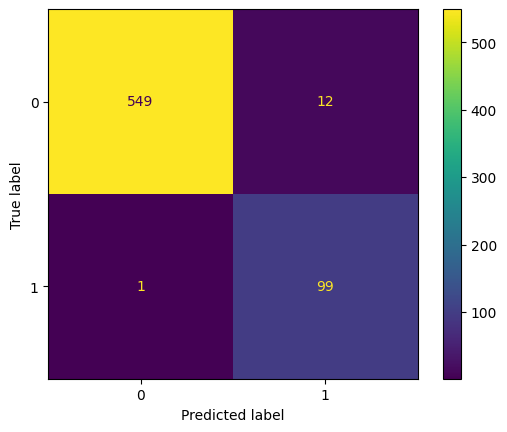

In [27]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
y_pred = naive_clf.predict(X_test)
print(f'The accuracy score is {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(naive_clf,X_test,y_test)